In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("insurance_data.csv")
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [4]:
x_train,x_test,y_train,y_test = train_test_split(df[['age']],df.bought_insurance,test_size=0.1)

In [5]:
model = LogisticRegression()

In [6]:
model.fit(x_train,y_train)

LogisticRegression()

In [7]:
x_test

,age
5,56
12,27
6,55


In [10]:
print(model.predict(x_test))
print(y_test)

[1 0 1]
5     1
12    0
6     0
Name: bought_insurance, dtype: int64


Download employee retention dataset from here: https://www.kaggle.com/giripujar/hr-analytics.

In [11]:
df = pd.read_csv('HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


<AxesSubplot:xlabel='Department'>

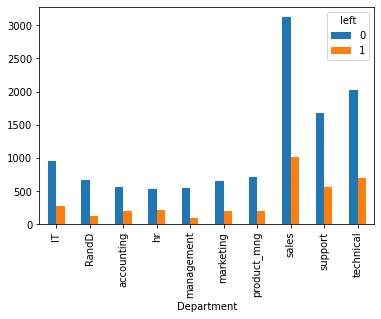

In [13]:
pd.crosstab(df.Department,df.left).plot(kind='bar')

In [14]:
dummies = pd.get_dummies(df.salary)
df = pd.concat([dummies,df],axis = 1)
df.drop(columns = 'salary',inplace=True)
df.drop(columns = 'high',inplace = True)

In [15]:
df.head()

,low,medium,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department
0,1,0,0.38,0.53,2,157,3,0,1,0,sales
1,0,1,0.80,0.86,5,262,6,0,1,0,sales
2,0,1,0.11,0.88,7,272,4,0,1,0,sales
3,1,0,0.72,0.87,5,223,5,0,1,0,sales
4,1,0,0.37,0.52,2,159,3,0,1,0,sales


In [16]:
sec_dummies = pd.get_dummies(df.Department)
df = pd.concat([sec_dummies,df],axis = 1)
df.drop(columns = 'Department',inplace=True)
df.drop(columns = 'sales',inplace=True)

In [17]:
df.head(5)

,IT,RandD,accounting,hr,management,marketing,product_mng,support,technical,low,medium,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0,0,0,0,0,0,0,0,0,1,0,0.38,0.53,2,157,3,0,1,0
1,0,0,0,0,0,0,0,0,0,0,1,0.80,0.86,5,262,6,0,1,0
2,0,0,0,0,0,0,0,0,0,0,1,0.11,0.88,7,272,4,0,1,0
3,0,0,0,0,0,0,0,0,0,1,0,0.72,0.87,5,223,5,0,1,0
4,0,0,0,0,0,0,0,0,0,1,0,0.37,0.52,2,159,3,0,1,0


In [18]:
x_train,x_test,y_train,y_test = train_test_split(df.drop(columns = 'left'),
                                                 df.left,test_size=0.1)

In [19]:
model = LogisticRegression()

In [20]:
model.fit(x_train,y_train)

D:\Conda\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [21]:
model.score(x_test,y_test)

0.7873333333333333